# Project: Investigate tmdb-movies Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I'll be using tmdb-movies dataset, this theme seems to me intersting because it's about movies and their informations like budget and IMDB scores and it was easier to me to create questions about it.
>
>Right at the beginning I've already though about the genres, like: What are the most produced film genre? Is that genre the most popular? If the most popular genre isn't the most produced, why they produce them so much? Is the reason to that related to profit?
>
>To undestand if profit is responsible to direct these trends, I would need to see what kind of properties are associated to high profit films. Those are the questions that I expect to answer with this analisys.
>
> In this project I'll be using pandas, numpy, matplotlib and seaborn, just creat a grid at the background.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#Loading data 
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#general look on the csv file
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#info that shows the names of the columns and also give information about
#missing data and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#number of rows and columns
df.shape

(10866, 21)

In [7]:
#ocurrence of duplicated rows
df.duplicated().sum()

1

### Data Cleaning

For this analysis, I've already determinated the questions and the datas that will be used to answer those questions. It seems to me that will be easyer to start organizing the dataset by eliminating columns that wont be used.

Those columns: `id`, `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `release_date`, `budget`, `revenue`, `production_companies`.

In [8]:
#dropping columns that will not be used
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords'], axis=1, inplace=True)
df.drop(['overview', 'release_date', 'budget', 'revenue', 'production_companies'], axis=1, inplace=True)

In [9]:
#view of the dataset
df

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,95,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


Next, I'll clean the missing datas. For those, types as int and float just need to fill missing datas with their means and for strings , its necessary to eliminate the entire row.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


It seems that the only missing datas are strings, so those rows are going to be excluded.

In [11]:
#deleting missing data rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   original_title  10843 non-null  object 
 2   runtime         10843 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10843 non-null  int64  
 5   vote_average    10843 non-null  float64
 6   release_year    10843 non-null  int64  
 7   budget_adj      10843 non-null  float64
 8   revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 847.1+ KB


Now it's time to eliminate duplcates.

In [12]:
#drop duplicates and verify
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Budget, revenue and runtime columns seems to have 0 value cost, those rows have to be eliminated.

In [13]:
#checking 0 values on revenue column
df[df['revenue_adj'] == 0]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,Wild Card,92,Thriller|Crime|Drama,481,5.3,2015,2.759999e+07,0.0
67,2.331636,Survivor,96,Crime|Thriller|Action,280,5.4,2015,1.839999e+07,0.0
74,2.165433,Mythica: The Darkspore,108,Action|Adventure|Fantasy,27,5.1,2015,0.000000e+00,0.0
75,2.141506,Me and Earl and the Dying Girl,105,Comedy|Drama,569,7.7,2015,0.000000e+00,0.0
92,1.876037,Mythica: The Necromancer,0,Fantasy|Action|Adventure,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,95,Documentary,11,7.4,1966,0.000000e+00,0.0
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.0
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.0
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4,1966,0.000000e+00,0.0


In [14]:
#eliminating 0 cost revenue
df = df[df['revenue_adj'] != 0]
df

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,131,Drama,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,Torn Curtain,128,Mystery|Thriller,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,El Dorado,120,Action|Western,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,28,7.0,1966,8.061618e+07,1.343603e+08


In [15]:
#Checking for 0 cost on budget column
df[df['budget_adj'] == 0]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,Mr. Holmes,103,Mystery|Drama,425,6.4,2015,0.0,2.700677e+07
36,3.358321,Solace,101,Crime|Drama|Mystery,474,6.2,2015,0.0,2.056620e+07
72,2.272044,Beyond the Reach,95,Thriller,81,5.5,2015,0.0,4.222338e+04
88,1.959765,Equals,101,Drama|Romance|Science Fiction,135,5.6,2015,0.0,1.839999e+06
95,1.841779,Alvin and the Chipmunks: The Road Chip,92,Adventure|Animation|Comedy|Family,278,5.7,2015,0.0,2.150550e+08
...,...,...,...,...,...,...,...,...,...
10766,0.591799,Paradise Alley,107,Action|Adventure|Drama,12,6.0,1978,0.0,2.401904e+07
10787,0.282763,Return From Witch Mountain,95,Adventure|Fantasy|Science Fiction|Family,22,5.8,1978,0.0,5.479689e+07
10812,0.318883,Gray Lady Down,111,Thriller|Adventure|History|Drama,10,6.1,1978,0.0,1.818071e+07
10817,0.064029,The Last Waltz,117,Documentary|Music,33,8.0,1978,0.0,1.076189e+06


In [16]:
#eliminating 0 cost budget
df = df[df['budget_adj'] != 0]
df

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,131,Drama,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,Torn Curtain,128,Mystery|Thriller,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,El Dorado,120,Action|Western,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,28,7.0,1966,8.061618e+07,1.343603e+08


In [17]:
#checking for 0 value runtime
df[df['runtime'] == 0]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


The rows with 0 values on runtime column have already been eliminated before when fixing revenue and budget columns. there is no need to fix anything now.

In [18]:
#checking the dataset
df

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,131,Drama,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,Torn Curtain,128,Mystery|Thriller,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,El Dorado,120,Action|Western,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,28,7.0,1966,8.061618e+07,1.343603e+08


Now the dataframe seems to be good to answer the questions.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are the most common of all years?

In [19]:
#first I'll split the collumn genres by '|' so I can count how many genres there are in the data
df['genres'] = df['genres'].str.split('|')

C:\Users\Fabio\AppData\Local\Temp/ipykernel_840/2852618790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.split('|')


In [20]:
#Let's see the results
df

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,"[Action, Crime, Thriller]",2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,131,[Drama],74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,Torn Curtain,128,"[Mystery, Thriller]",46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,El Dorado,120,"[Action, Western]",36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,The Sand Pebbles,182,"[Action, Adventure, Drama, War, Romance]",28,7.0,1966,8.061618e+07,1.343603e+08


In [21]:
#now I'll use explode to separate all the genres from each title making a array with all the genres
#and then I just nedd to count how many times each genre appears
num_genres = df['genres'].explode().value_counts()

In [22]:
#viewing the numbers
num_genres

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

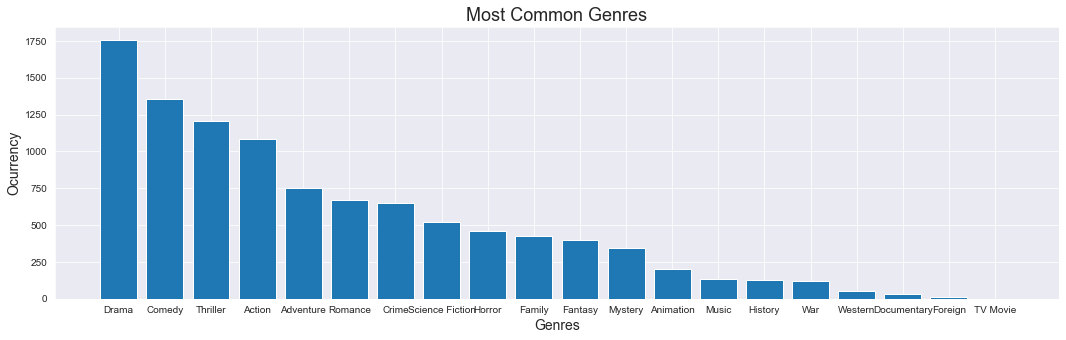

In [23]:
#now that I filtered what I wanted, I'll plot
plt.subplots(figsize=(18,5));
plt.bar(num_genres.index, num_genres);
plt.title("Most Common Genres", fontsize=18);
plt.xlabel("Genres", fontsize=14);
plt.ylabel("Ocurrency", fontsize=14);

It seems that drama is the most common genre.

### Which genres are the moste popular from all years.

In [24]:
#I'll creat a dataframe that contains all genres but preserve their index in the original dataframe
pop_genres = pd.DataFrame(df['genres'].explode())

In [25]:
#viewing the dataframe
pop_genres

,genres
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action
...,...
10835,Drama
10835,War
10835,Romance
10848,Adventure


In [26]:
#I'll creat a column with popularity from original dataframe in this new one
#in each index from the orignal dataframe there is a list of genres and their popularity
pop_genres['popularity'] = df['popularity']

In [27]:
#viewing the data frame
pop_genres

,genres,popularity
0,Action,32.985763
0,Adventure,32.985763
0,Science Fiction,32.985763
0,Thriller,32.985763
1,Action,28.419936
...,...,...
10835,Drama,0.299911
10835,War,0.299911
10835,Romance,0.299911
10848,Adventure,0.207257


In [28]:
#now that I have each genres and their popularity I'll group them by genres and take their means
means = pop_genres.groupby('genres')['popularity'].mean()

In [29]:
#in this array that contains means I need to organize then in decrease order
means = means.sort_values(ascending=False)

In [30]:
#viewing the array
means

genres
Science Fiction    1.873294
Adventure          1.867693
Fantasy            1.754315
Animation          1.710622
Action             1.567116
Family             1.459043
Thriller           1.258950
War                1.246129
Mystery            1.142613
Western            1.134246
Crime              1.123961
Comedy             1.012321
Drama              1.001411
History            0.970674
Romance            0.954889
Music              0.899005
Horror             0.854005
Documentary        0.294458
TV Movie           0.273628
Foreign            0.179608
Name: popularity, dtype: float64

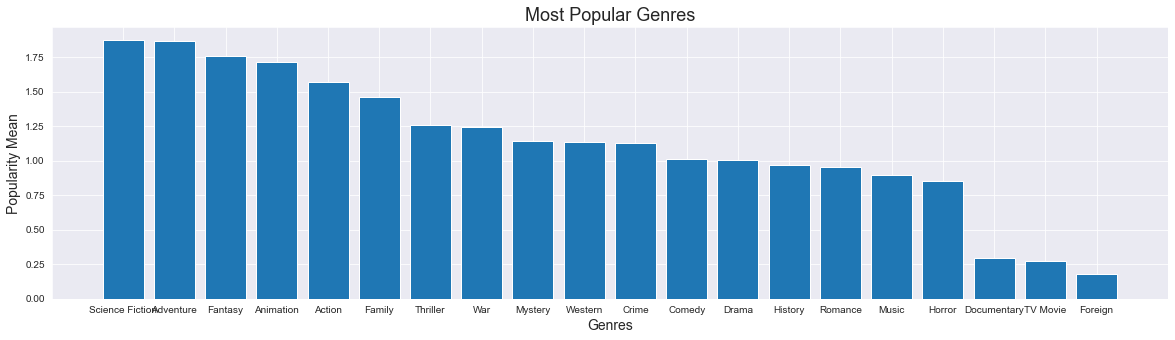

In [31]:
#now I'll plot the results to see te most popular genre
plt.subplots(figsize=(20,5));
plt.bar(means.index, means);
plt.title("Most Popular Genres", fontsize=18);
plt.xlabel("Genres", fontsize=14);
plt.ylabel("Popularity Mean", fontsize=14);

The most popular genre is Science Fiction.

### What kinds of properties are associated with movies that have high profits?

In [32]:
#creating a collumn of levels of profit
profit = df['revenue_adj'] - df['budget_adj']
#to classify high profit I'll consider those above 75%
profit.describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
dtype: float64

In [33]:
#separating profit levels as low, mid_low, mid_high and high
bin_edges = [-4.139124e+08, -1.504995e+06, 2.737064e+07, 1.074548e+08, 2.750137e+09]
bin_names = ['high', 'mid_high', 'mid_low', 'low']

In [34]:
#creating a new column with profit levels
df['profit_levels'] = pd.cut(profit, bin_edges, labels=bin_names)

C:\Users\Fabio\AppData\Local\Temp/ipykernel_840/1207128265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit_levels'] = pd.cut(profit, bin_edges, labels=bin_names)


In [35]:
#previewing the dataframe
df

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_levels
0,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1.379999e+08,1.392446e+09,low
1,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,1.379999e+08,3.481613e+08,low
2,13.112507,Insurgent,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,1.012000e+08,2.716190e+08,low
3,11.173104,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,1.839999e+08,1.902723e+09,low
4,9.335014,Furious 7,137,"[Action, Crime, Thriller]",2947,7.3,2015,1.747999e+08,1.385749e+09,low
...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,131,[Drama],74,7.5,1966,5.038511e+07,2.266436e+08,low
10828,0.402730,Torn Curtain,128,"[Mystery, Thriller]",46,6.3,1966,2.015404e+07,8.733419e+07,mid_low
10829,0.395668,El Dorado,120,"[Action, Western]",36,6.9,1966,3.125892e+07,4.030809e+07,mid_high
10835,0.299911,The Sand Pebbles,182,"[Action, Adventure, Drama, War, Romance]",28,7.0,1966,8.061618e+07,1.343603e+08,mid_low


In [36]:
#creating a group separated by profit levels to show how the other properties behave by it.
plot = df.groupby('profit_levels').mean()
plot

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
profit_levels,,,,,,,
high,0.632174,107.474559,142.761163,5.838214,2002.854621,3.799863e+07,1.940588e+07
mid_high,0.768118,104.701973,246.932503,6.101661,2002.450675,2.304452e+07,3.285124e+07
mid_low,1.132754,108.437175,448.867082,6.238941,2000.538941,3.760250e+07,9.763056e+07
low,2.233065,116.269710,1272.018672,6.493257,1999.192946,7.788399e+07,3.982307e+08


### Popularity

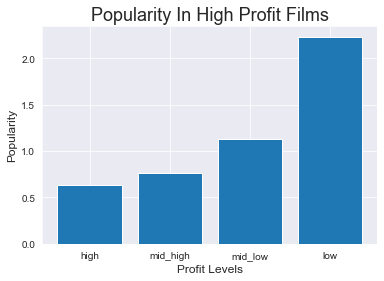

In [37]:
#ploting popularity x profit levels
plt.bar(plot.index, plot['popularity']);
plt.title("Popularity In High Profit Films", fontsize=18);
plt.xlabel("Profit Levels", fontsize=12);
plt.ylabel("Popularity", fontsize=12);

Films with low profit seems to have higher levels of popularity than high profit films, wich have the lowest popularity of all levels.

### Budget

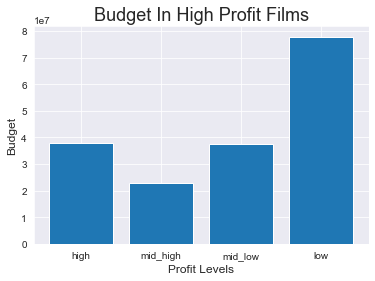

In [38]:
#polting budget x profit levels
plt.bar(plot.index, plot['budget_adj']);
plt.title("Budget In High Profit Films", fontsize=18);
plt.xlabel("Profit Levels", fontsize=12);
plt.ylabel("Budget", fontsize=12);

It seems that high budget films doens't generates high profits. Films with high profit tend have average budget cost.

### Revenue

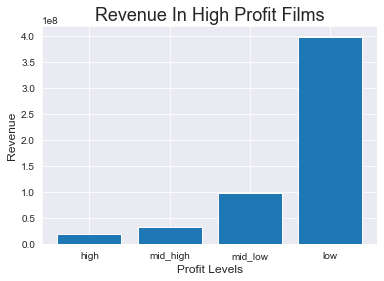

In [39]:
#ploting revenue x profit levels
plt.bar(plot.index, plot['revenue_adj']);
plt.title("Revenue In High Profit Films", fontsize=18);
plt.xlabel("Profit Levels", fontsize=12);
plt.ylabel("Revenue", fontsize=12);

It seems that films that got high revenue got low profit. The low profit level have only films with negative profit.

### Vote count

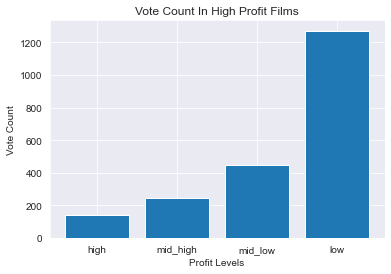

In [40]:
#ploting vote count x profit levels
plt.bar(plot.index, plot['vote_count']);
plt.title("Vote Count In High Profit Films");
plt.xlabel("Profit Levels");
plt.ylabel("Vote Count");

### Vote Average

<BarContainer object of 4 artists>

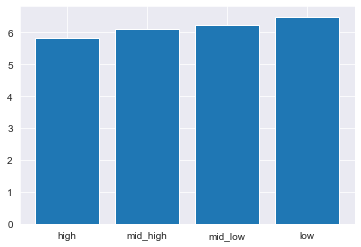

In [41]:
plt.bar(plot.index, plot['vote_average'])

Despite high budget films have the higher imdb mean vote average, it doesn't represents a correlation. The films on the low budget have higher imdb mean score than medium high and medium low. If they were correlated, the average imdb score should be in ascending order the higher the budget gets and they are not.

### Runtime

<BarContainer object of 4 artists>

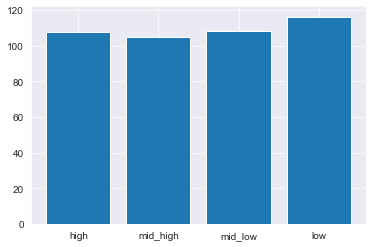

In [42]:
plt.bar(plot.index, plot['runtime'])

### Genres

In [43]:
pop_genres['profit_levels'] = df['profit_levels']

In [44]:
pop_genres

,genres,popularity,profit_levels
0,Action,32.985763,low
0,Adventure,32.985763,low
0,Science Fiction,32.985763,low
0,Thriller,32.985763,low
1,Action,28.419936,low
...,...,...,...
10835,Drama,0.299911,mid_low
10835,War,0.299911,mid_low
10835,Romance,0.299911,mid_low
10848,Adventure,0.207257,mid_low


In [45]:
teste = pop_genres.groupby('profit_levels')['genres'].value_counts()
teste

profit_levels  genres     
high           Drama          525
               Thriller       337
               Comedy         307
               Action         277
               Crime          175
                             ... 
low            Music           39
               War             36
               History         25
               Western         13
               Documentary      1
Name: genres, Length: 76, dtype: int64

In [46]:
teste['high'].max()

525

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!